In [609]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

import warnings
warnings.filterwarnings('ignore')

In [610]:
data = pd.read_csv('./train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [611]:
len(data)

891

In [612]:
len(np.array(data['Cabin'].value_counts().index))

147

In [613]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [614]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cols = ['Sex', 'Embarked', 'Cabin']

for col in cols:
    data[col] = le.fit_transform(data[col].astype(str))

In [615]:
data.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [616]:
X = data.drop('Survived', axis=1).values
y = data['Survived'].values

In [617]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median') # fill each with the column's median value
imputer.fit(X[:])
X[:] = imputer.transform(X[:])

In [618]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [619]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [620]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

rf = RandomForestClassifier().fit(X_train, y_train)
rf.score(X_test, y_test)

0.8212290502793296

In [621]:
# 100 estimators
rf_100 = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
rf_100.score(X_test, y_test)

0.8212290502793296

In [622]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier().fit(X_train, y_train)
knn.score(X_test, y_test)

0.8044692737430168

In [623]:
from sklearn.linear_model import LogisticRegression

np.random.seed(42)

lr = LogisticRegression().fit(X_train, y_train)
lr.score(X_test, y_test)

0.7988826815642458

In [624]:
from sklearn.svm import SVC

np.random.seed(42)

svc = SVC().fit(X_train, y_train)
svc.score(X_test, y_test)

0.8100558659217877

In [625]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier().fit(X_train, y_train)
dt.score(X_test, y_test)

0.7653631284916201

In [626]:
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(n_estimators=100)
cv_acc = cross_val_score(clf, X, y, scoring='accuracy', cv=10)
print(f"cross-val accuracy (mean): {np.mean(cv_acc)*100:.2f}%")

cross-val accuracy (mean): 83.17%


In [627]:
clf = LogisticRegression()
cv_acc = cross_val_score(clf, X, y, scoring='accuracy', cv=10)
print(f"cross-val accuracy (mean): {np.mean(cv_acc)*100:.2f}%")

cross-val accuracy (mean): 79.01%


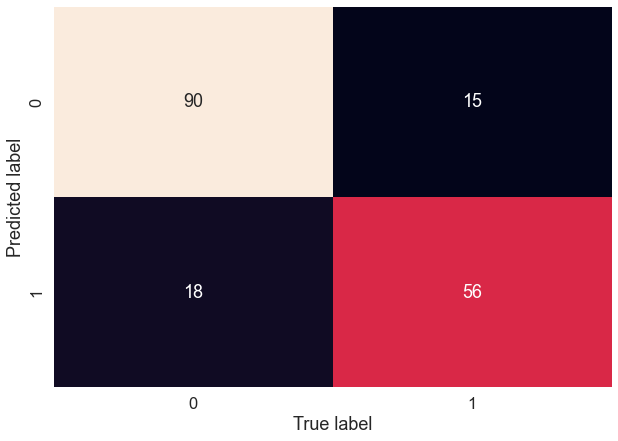

In [628]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

sns.set(font_scale=1.5)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

def plot_conf_mat(y_test, y_pred):
  fig, ax = plt.subplots(figsize=(10,7))
  ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar=False)
  plt.xlabel("True label")
  plt.ylabel("Predicted label")

plot_conf_mat(y_test, y_pred)

In [629]:
from sklearn.metrics import classification_report

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



### predicting test dataset

In [630]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = sc.fit_transform(X)

In [631]:
np.random.seed(42)

rf_100 = RandomForestClassifier(n_estimators=100).fit(X, y)

In [632]:
test_data = pd.read_csv('./test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [633]:
test_data.shape

(418, 11)

In [634]:
test_data.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [635]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [636]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,7.8292,NaN,Q
1,893,3,female,47.0,1,0,7.0000,NaN,S
2,894,2,male,62.0,0,0,9.6875,NaN,Q
3,895,3,male,27.0,0,0,8.6625,NaN,S
4,896,3,female,22.0,1,1,12.2875,NaN,S


In [637]:
passenger_id = test_data['PassengerId'].values
passenger_id

array([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,  902,
        903,  904,  905,  906,  907,  908,  909,  910,  911,  912,  913,
        914,  915,  916,  917,  918,  919,  920,  921,  922,  923,  924,
        925,  926,  927,  928,  929,  930,  931,  932,  933,  934,  935,
        936,  937,  938,  939,  940,  941,  942,  943,  944,  945,  946,
        947,  948,  949,  950,  951,  952,  953,  954,  955,  956,  957,
        958,  959,  960,  961,  962,  963,  964,  965,  966,  967,  968,
        969,  970,  971,  972,  973,  974,  975,  976,  977,  978,  979,
        980,  981,  982,  983,  984,  985,  986,  987,  988,  989,  990,
        991,  992,  993,  994,  995,  996,  997,  998,  999, 1000, 1001,
       1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012,
       1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023,
       1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034,
       1035, 1036, 1037, 1038, 1039, 1040, 1041, 10

In [638]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cols = ['Sex', 'Embarked', 'Cabin']

for col in cols:
    test_data[col] = le.fit_transform(test_data[col].astype(str))

In [640]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median') # fill each with the column's median value
imputer.fit(test_data)
test_data = imputer.transform(test_data)

In [641]:
test_data

array([[8.92000e+02, 3.00000e+00, 1.00000e+00, ..., 7.82920e+00,
        7.60000e+01, 1.00000e+00],
       [8.93000e+02, 3.00000e+00, 0.00000e+00, ..., 7.00000e+00,
        7.60000e+01, 2.00000e+00],
       [8.94000e+02, 2.00000e+00, 1.00000e+00, ..., 9.68750e+00,
        7.60000e+01, 1.00000e+00],
       ...,
       [1.30700e+03, 3.00000e+00, 1.00000e+00, ..., 7.25000e+00,
        7.60000e+01, 2.00000e+00],
       [1.30800e+03, 3.00000e+00, 1.00000e+00, ..., 8.05000e+00,
        7.60000e+01, 2.00000e+00],
       [1.30900e+03, 3.00000e+00, 1.00000e+00, ..., 2.23583e+01,
        7.60000e+01, 0.00000e+00]])

In [642]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

test_data = sc.fit_transform(test_data)

In [643]:
y_pred = rf_100.predict(test_data)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [644]:
preds = {}

for i in range(len(y_pred)):
    preds[passenger_id[i]] = y_pred[i]

In [645]:
pred_df = pd.DataFrame({'PassengerId': [x for x in preds.keys()], 'Survived': [x for x in preds.values()]})
pred_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [646]:
pred_df.to_csv('preds.csv', index=False)